# Chapter 7: Image Transforms
This is the companion file for Chapter 7.

## Video 7.1. A useful explanation of vector spaces

[![A useful explanation of vector spaces](https://img.youtube.com/vi/ozwodzD5bJM/0.jpg)](https://www.youtube.com/watch?v=ozwodzD5bJM)


## Video 7.2. What are eigenvector and eigenvalue of a matrix?

[![What are eigenvector and eigenvalue of a matrix?](https://img.youtube.com/vi/PFDu9oVAE-g/0.jpg)](https://www.youtube.com/watch?v=PFDu9oVAE-g)


## Video 7.3. The colorful life of John Baptiste Fourier (Part 1)

[![The colorful life of John Baptiste Fourier (Part 1)](https://img.youtube.com/vi/2bSw38dqRrU/0.jpg)](https://www.youtube.com/watch?v=2bSw38dqRrU)


## Video 7.4. There are a lot of lessons to be taken from the life of Fourier (Part 2)

[![There are a lot of lessons to be taken from the life of Fourier (Part 2)](https://img.youtube.com/vi/6qiIMrBOmOo/0.jpg)](https://www.youtube.com/watch?v=6qiIMrBOmOo)


## **Programming exercise 7.1:**

1.   Run the following code to see the output of Fourier transformaiton.
2.   Change sigma to 3 and see how the output changes.
3.   Rotate the input image 45 degrees and see the output.

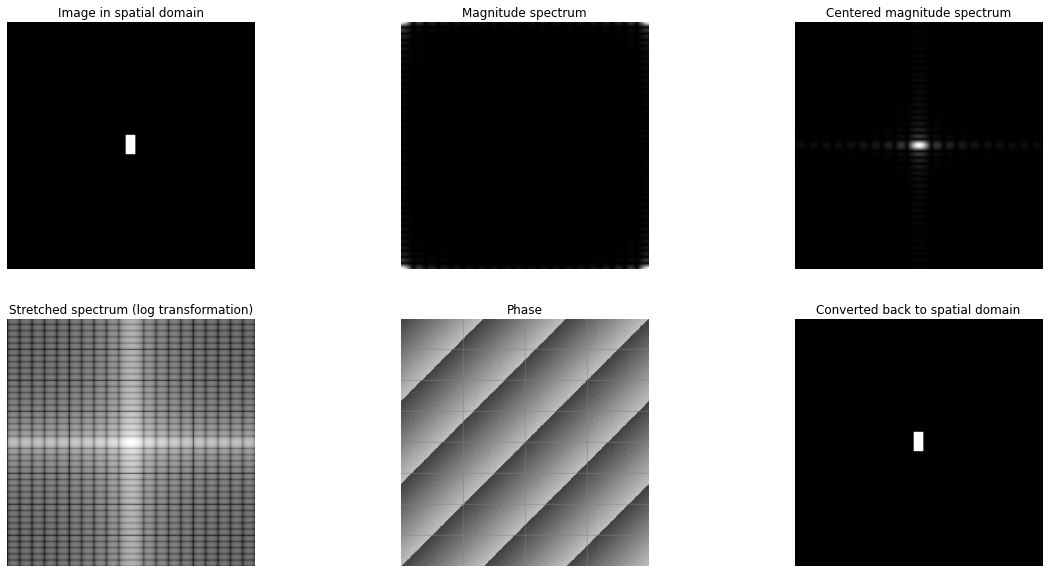

In [1]:
# Fourier transformation

import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack as fp 

# Image in spatial domain
img = np.zeros([512,512],dtype=np.uint8)
img[235:275, 245:265] = 255

# Image in Fourier domain
img_f = fp.fftn(img);
# Magnitude spectrum
magn = abs(img_f); 
# Magnitude spectrum (centered)
magn_centered = fp.fftshift(magn)
# Stretched spectrum (log transformation)
log_magn = np.log(1 + magn_centered);
# Phase
img_phase = np.angle(img_f)
# Image converted back in spatial domain
converted = np.real(fp.ifftn(img_f))

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.imshow(img,cmap='gray');
plt.title('Image in spatial domain');
plt.axis('off');

plt.subplot(2,3,2)
plt.imshow(magn, cmap='gray');
plt.title('Magnitude spectrum');
plt.axis('off');

plt.subplot(2,3,3)
plt.imshow(magn_centered, cmap='gray');
plt.title('Centered magnitude spectrum');
plt.axis('off');

plt.subplot(2,3,4)
plt.imshow(log_magn, cmap='gray');
plt.title('Stretched spectrum (log transformation)');
plt.axis('off');

plt.subplot(2,3,5)
plt.imshow(img_phase, cmap='gray');
plt.title('Phase');
plt.axis('off');

plt.subplot(2,3,6)
plt.imshow(converted, cmap='gray');
plt.title('Converted back to spatial domain');
plt.axis('off');

## Video 7.5. A video which demonstrates the Fourier transform

[![A nice video which demonstrates the Fourier transform.](https://img.youtube.com/vi/gwaYwRwY6PU/0.jpg)](https://www.youtube.com/watch?v=gwaYwRwY6PU)


## **Programming exercise 7.2:**

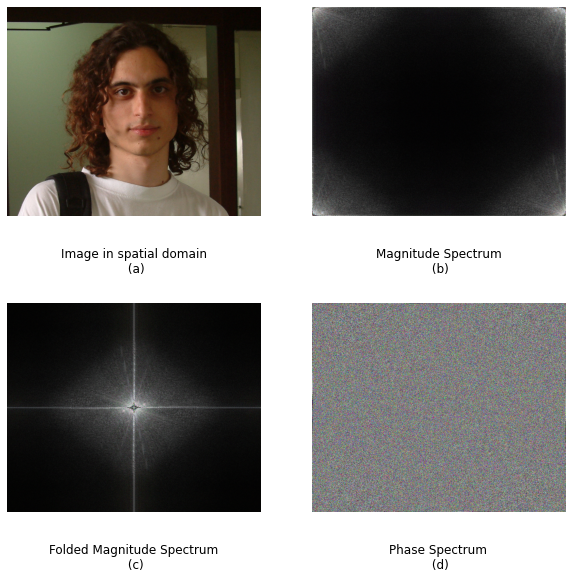

In [2]:
# Fourier Transform

import numpy as np
import matplotlib.image
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image

plt.figure(figsize=(10,10))

#read the original image
url = "https://raw.githubusercontent.com/itironal/466Companion/main/images/dervis_hocam.png"
original_img = np.array(Image.open(urllib.request.urlopen(url)))/255

plt.subplot(2,2,1)
plt.imshow(original_img);
plt.title('Image in spatial domain\n (a)', y=-0.3);
plt.axis('off');

#fourier transformation of channels
fourier_transform_red_channel = np.fft.fft2(original_img[:,:,0])
fourier_transform_green_channel = np.fft.fft2(original_img[:,:,1])
fourier_transform_blue_channel = np.fft.fft2(original_img[:,:,2])
#absolute value for magnitude spectrum (real part)
magnitude_spectrum_red = abs(fourier_transform_red_channel)
magnitude_spectrum_green = abs(fourier_transform_green_channel)
magnitude_spectrum_blue = abs(fourier_transform_blue_channel)

#log transformation to enhance white areas for better visualization
#normalizing to show as rgb image
log_transformation_mag = np.log(1 + np.dstack((magnitude_spectrum_red, magnitude_spectrum_green, magnitude_spectrum_blue)))
log_transformation_mag = np.power(log_transformation_mag/np.max(log_transformation_mag), 2)*3

plt.subplot(2,2,2)
plt.imshow((log_transformation_mag * 255).astype(np.uint8));
plt.title('Magnitude Spectrum\n (b)', y=-0.3);
plt.axis('off');

#magnitude spectrum folded to center from the corners
folded_mag = np.fft.fftshift(log_transformation_mag)

plt.subplot(2,2,3)
plt.imshow((folded_mag * 255).astype(np.uint8));
plt.title('Folded Magnitude Spectrum\n (c)', y=-0.3);
plt.axis('off');

#angle for phase spectrum
phase_red = np.angle(fourier_transform_red_channel)
phase_green = np.angle(fourier_transform_green_channel)
phase_blue = np.angle(fourier_transform_blue_channel)

phase = np.dstack((phase_red, phase_green, phase_blue))

plt.subplot(2,2,4)
plt.imshow((phase * 255).astype(np.uint8))
plt.title('Phase Spectrum\n (d)', y=-0.3);
plt.axis('off');
plt.show();

## **Programming exercise 7.3:**

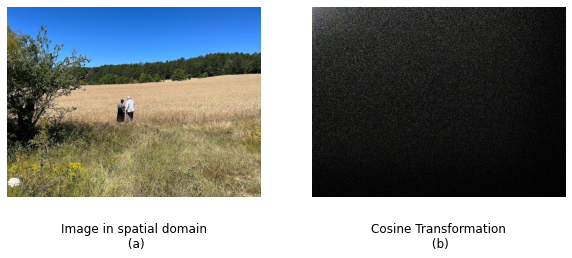

In [3]:
# Cosine Transform

import numpy as np
from scipy.fftpack import dct
import matplotlib.image
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image

plt.figure(figsize=(10,5))
#plt.rcParams.update({'font.size': 18})

#read original image 
url = "https://raw.githubusercontent.com/itironal/466Companion/main/images/fatos_hocam_background.png"
original_img = np.array(Image.open(urllib.request.urlopen(url)))/255

plt.subplot(1,2,1)
plt.imshow(original_img)
plt.title('Image in spatial domain\n (a)', y=-0.3)
plt.axis('off')

#cosine transformation of channels
cosine_red = dct( dct( original_img[:,:,0], axis=0, norm='ortho' ), axis=1, norm='ortho' )
cosine_green = dct( dct( original_img[:,:,1], axis=0, norm='ortho' ), axis=1, norm='ortho' )
cosine_blue = dct( dct( original_img[:,:,2], axis=0, norm='ortho' ), axis=1, norm='ortho' )

#normalizing to show as rgb image
cosine_transformation = np.dstack((cosine_red, cosine_green, cosine_blue))

#enhance the transformation for better visualization
cosine_transformation = np.power(cosine_transformation, 2)*4

plt.subplot(1,2,2)
plt.imshow((cosine_transformation * 255).astype(np.uint8))
plt.title('Cosine Transformation\n (b)', y=-0.3)
plt.axis('off')

plt.show()


## **Programming exercise 7.4:**

1.   Run the following code to perform convolution with a Gaussian filter (by multiplying the transformed image and kernel in the frequency domain).


In [ ]:
import numpy as np
import scipy.fftpack as fp
import matplotlib.pyplot as plt
from scipy import signal
from skimage import io, color

# Load and preprocess the image
url = "https://raw.githubusercontent.com/itironal/466Companion/main/images/redmushroom.jpeg"
urllib.request.urlretrieve(url, "images/redmushroom.jpeg")
image_rgb = io.imread('images/redmushroom.jpeg')[800:1311, 513:1024, :]  # Load full RGB image
image_gray = color.rgb2gray(image_rgb)  # Convert to grayscale for frequency processing

# Define the Gaussian kernel for low-pass filtering
sigma = 3
kernel = np.outer(signal.gaussian(image_gray.shape[0], sigma), signal.gaussian(image_gray.shape[1], sigma))

# Convert image and kernel to frequency domain
freq_image = fp.fft2(image_gray)
freq_kernel = fp.fft2(fp.ifftshift(kernel))

# Perform convolution in the frequency domain
convolved = freq_image * freq_kernel
output_image = fp.ifft2(convolved).real

# Plotting the results
plt.figure(figsize=(20, 10))

# Original RGB Image
plt.subplot(1, 5, 1)
plt.imshow(image_rgb)
plt.title('Original RGB Image')
plt.axis('off')

# Grayscale Image in Spatial Domain
plt.subplot(1, 5, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Kernel in Spatial Domain
plt.subplot(1, 5, 3)
plt.imshow(kernel, cmap='gray')
plt.title('Kernel in Spatial Domain')
plt.axis('off')

# Kernel in Frequency Domain
plt.subplot(1, 5, 4)
plt.imshow(np.real(fp.fftshift(freq_kernel)), cmap='gray')
plt.title('Kernel in Frequency Domain')
plt.axis('off')

# Filtered Image (Grayscale)
plt.subplot(1, 5, 5)
plt.imshow(output_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()


## **Programming exercise 7.5:**

1.   Run the following code to perfrom low pass filtering in frequency domain.
2.   Change filter size to 100 and run the code. What change do you see in the filtered image?

In [ ]:
# Low pass filtering in the frequency spectrum 

# Load and preprocess the image
url = "https://raw.githubusercontent.com/itironal/466Companion/main/images/redmushroom.jpeg"
urllib.request.urlretrieve(url, "images/redmushroom.jpeg")
image_rgb = io.imread('images/redmushroom.jpeg')[800:1311, 513:1024, :]  # Load full RGB image
image_gray = color.rgb2gray(image_rgb)  # Convert to grayscale for frequency processing

# Perform the Fourier Transform of the grayscale image to move to frequency domain
freq_image = fp.fft2(image_gray)

# Define the size of the low-pass filter
filter_size = 30

# Shift the frequency components so that the low-frequency components are at the center
freq_image_centered = fp.fftshift(freq_image)

# Create an empty low-pass filter with the same shape as the frequency image
low_pass = fp.fft2(np.zeros((freq_image_centered.shape[0], freq_image_centered.shape[1])))

# Define the region to be kept for the low-pass filter in the center
low_pass[int(freq_image_centered.shape[0]/2) - filter_size-1:int(freq_image_centered.shape[0]/2) + filter_size, 
         int(freq_image_centered.shape[1]/2) - filter_size-1:int(freq_image_centered.shape[1]/2) + filter_size] = \
    freq_image_centered[int(freq_image_centered.shape[0]/2) - filter_size-1:int(freq_image_centered.shape[0]/2) + filter_size, 
                        int(freq_image_centered.shape[1]/2) - filter_size-1:int(freq_image_centered.shape[1]/2) + filter_size]

# Perform the inverse Fourier transform to convert the filtered image back to spatial domain
filtered_image = fp.ifft2(fp.ifftshift(low_pass)).real

# Plot the results
plt.figure(figsize=(12,12))

# Plot the original grayscale image
plt.subplot(2,2,1)
plt.imshow(image_gray, cmap='gray') 
plt.title('Original Image')
plt.axis('off')

# Plot the magnitude of the original image in the frequency domain (log scale)
plt.subplot(2,2,2)
plt.imshow((10*np.log10(1 + freq_image)).astype(int), cmap='gray') 
plt.title('Original Image Spectrum')
plt.axis('off')

# Plot the low-pass filtered image after inverse FFT
plt.subplot(2,2,3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Low Pass Filtered Image')
plt.axis('off')

# Plot the low-pass filter in the frequency domain (log scale)
plt.subplot(2,2,4)
plt.imshow((10*np.log10(1+ low_pass)).astype(int), cmap='gray') 
plt.title('Low Pass Filter Image Spectrum')
plt.axis('off')

# Show the plots
plt.show()


## **Programming exercise 7.6:**

1.   Run the following code to perfrom high pass filtering in frequency domain.
2.   Change filter size to 5 and run the code. What change do you see in the filtered image?

In [ ]:
# High pass filtering in the frequency spectrum 

# Load and preprocess the image
url = "https://raw.githubusercontent.com/itironal/466Companion/main/images/redmushroom.jpeg"
urllib.request.urlretrieve(url, "images/redmushroom.jpeg")
image_rgb = io.imread('images/redmushroom.jpeg')[800:1311, 513:1024, :]  # Load full RGB image
image_gray = color.rgb2gray(image_rgb)  # Convert to grayscale for frequency processing

# Perform the Fourier Transform of the grayscale image to move to frequency domain
freq_image = fp.fft2(image_gray)

# Define the size of the high-pass filter
filter_size = 20

# Shift the frequency components so that the low-frequency components are at the center
freq_image_centered = fp.fftshift(freq_image)

# Create a copy of the frequency image to apply the high-pass filter
high_pass = np.copy(freq_image_centered)

# Set the low-frequency region (center) of the frequency image to zero, removing low-frequency components
high_pass[int(freq_image_centered.shape[0]/2) - filter_size-1:int(freq_image_centered.shape[0]/2) + filter_size, 
          int(freq_image_centered.shape[1]/2) - filter_size-1:int(freq_image_centered.shape[1]/2) + filter_size] = 0

# Perform the inverse Fourier transform to convert the filtered image back to spatial domain
filtered_image = fp.ifft2(fp.ifftshift(high_pass)).real

# Plot the results
plt.figure(figsize=(12,12))

# Plot the original grayscale image
plt.subplot(2,2,1)
plt.imshow(image_gray, cmap='gray') 
plt.title('Original Image')
plt.axis('off')

# Plot the magnitude of the original image in the frequency domain (log scale)
plt.subplot(2,2,2)
plt.imshow((10*np.log10(1 + freq_image)).astype(int), cmap='gray') 
plt.title('Original Image Spectrum')
plt.axis('off')

# Plot the high-pass filtered image after inverse FFT
plt.subplot(2,2,3)
plt.imshow(filtered_image, cmap='gray')
plt.title('High Pass Filtered Image')
plt.axis('off')

# Plot the high-pass filter in the frequency domain (log scale)
plt.subplot(2,2,4)
plt.imshow((10*np.log10(1+ high_pass)).astype(int), cmap='gray') 
plt.title('High Pass Filter Image Spectrum')
plt.axis('off')

# Show the plots
plt.show()



## **Programming exercise 7.7:**

1.   Run the following code to perfrom band pass filtering in frequency domain.
2.   Change sizes of filter and filter2 and run the code. What change do you see in the filtered image?

In [ ]:
# Band pass filtering in the frequency spectrum 

# Load and preprocess the image
url = "https://raw.githubusercontent.com/itironal/466Companion/main/images/redmushroom.jpeg"
urllib.request.urlretrieve(url, "images/redmushroom.jpeg")
image_rgb = io.imread('images/redmushroom.jpeg')[800:1311, 513:1024, :]  # Load full RGB image
image_gray = color.rgb2gray(image_rgb)  # Convert to grayscale for frequency processing

# Perform the Fourier Transform of the grayscale image to move to the frequency domain
freq_image = fp.fft2(image_gray)

# Define the size of the outer low-frequency filter and the inner high-frequency filter
filter_size = 40
filter2_size = 10

# Shift the frequency components so that low frequencies are at the center
freq_image_centered = fp.fftshift(freq_image)

# Create a copy of the frequency image to apply the band-pass filter
band_pass = np.copy(freq_image_centered)

# Apply the outer low-pass filter by zeroing out the high frequencies (the center)
band_pass[int(freq_image_centered.shape[0]/2) - filter_size-1:int(freq_image_centered.shape[0]/2) + filter_size, 
          int(freq_image_centered.shape[1]/2) - filter_size-1:int(freq_image_centered.shape[1]/2) + filter_size] = 0

# Apply the inner high-pass filter by zeroing out the very low frequencies (center region)
band_pass[int(freq_image_centered.shape[0]/2) - filter2_size-1:int(freq_image_centered.shape[0]/2) + filter2_size, 
          int(freq_image_centered.shape[1]/2) - filter2_size-1:int(freq_image_centered.shape[1]/2) + filter2_size] = \
    freq_image_centered[int(freq_image_centered.shape[0]/2) - filter2_size-1:int(freq_image_centered.shape[0]/2) + filter2_size, 
                        int(freq_image_centered.shape[1]/2) - filter2_size-1:int(freq_image_centered.shape[1]/2) + filter2_size]

# Perform the inverse Fourier transform to convert the filtered image back to spatial domain
filtered_image = fp.ifft2(fp.ifftshift(band_pass)).real

# Plot the results
plt.figure(figsize=(12,12))

# Plot the original grayscale image
plt.subplot(2,2,1)
plt.imshow(image_gray, cmap='gray') 
plt.title('Original Image')
plt.axis('off')

# Plot the magnitude of the original image in the frequency domain (log scale)
plt.subplot(2,2,2)
plt.imshow((10*np.log10(1 + freq_image)).astype(int), cmap='gray') 
plt.title('Original Image Spectrum')
plt.axis('off')

# Plot the band-pass filtered image after inverse FFT
plt.subplot(2,2,3)
plt.imshow(filtered_image, cmap='gray') 
plt.title('Band Pass Filtered Image')
plt.axis('off')

# Plot the band-pass filter in the frequency domain (log scale)
plt.subplot(2,2,4)
plt.imshow((10*np.log10(1+ band_pass)).astype(int), cmap='gray') 
plt.title('Band Pass Filter Image Spectrum')
plt.axis('off')

# Show the plots
plt.show()
